In [1]:
from sklearn.datasets import fetch_openml
from matplotlib import pyplot as plt
from sklearn import decomposition
import numpy as np
%matplotlib inline
import matplotlib
import math

plt.rcParams['font.size'] = '12'

In [2]:
## Computing the full singular value decomposition for the MNIST dataset
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

#Remove mean before applying PCA
X_mean0 = np.array(X - np.mean(X, axis = 0))

U, E, V_T = np.linalg.svd(X_mean0, full_matrices=False)
E2 = np.array([pow(e,2) for e in E]) # Computing the powers of 2
E3 = E2/np.sum(E2) # Computing the Factor score ratios

In [3]:
np.allclose(X_mean0, U@np.diag(E)@V_T), np.isclose(np.sum(E3), 1)

(True, True)

In [6]:
def find_index(vector, p):
    sum_ = 0
    i = 0
    while (sum_ < p):
        sum_ += vector[i]
        i += 1
    return i

def compute_lambda(A, APCA, p):
    lambda_ = 0
    for i in range(A.shape[0]):
        norma = np.linalg.norm(APCA[i])/np.linalg.norm(A[i])
        if (norma > p or np.isclose(norma, p)):
            lambda_ += 1
    return lambda_/A.shape[0]
        
lambdas = []
p_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
for p in p_list:
    k = find_index(E3, p)
    V_TK = V_T[:k]
    PCA_MAT = X_mean0@V_TK.T
    lambdas.append(compute_lambda(X_mean0, PCA_MAT, p))


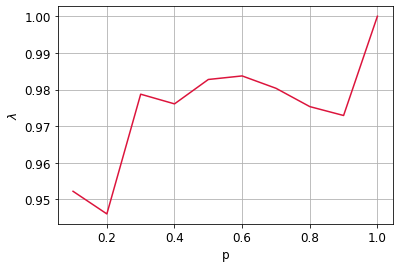

In [7]:
plt.plot(p_list, lambdas, color="crimson")
plt.grid()

plt.xlabel(r"p")
plt.ylabel(r"$\lambda$")
plt.savefig('MNIST_lamba_computation.pdf', bbox_inches='tight')

In [8]:
np.mean(lambdas)

0.9748157142857142